<br>

**what was done was mainly html files, groups of accounts, and viz wordcloud image files**

# Analysis of Twitter data around Aquaman petition mentions 
MAHMOUD NAGY - Jun 2022

---

In [31]:
import numpy as np
import pandas as pd
import json 
import os
import matplotlib.pyplot as plt
import seaborn as sb
from time import time

%config InlineBackend.figure_format = 'retina'

In [2]:
months = [(1, 'jan'), (2, 'feb'), (3, 'mar'), (4, 'apr'), (5, 'may'), (6, 'jun'), 
          (7, 'jul'), (8, 'aug'), (9, 'sep'), (10, 'oct'), (11, 'nov'), (12, 'dec')]
years = ['2018', '2019', '2020', '2021', '2022']

## Total Number of CSV (USERS) and JSON (TWEETS) Files 
(Clusters)

### CSV (USERS)

In [26]:
t0 = time()

i = 0 
for year in years:
    for month in months:
        path = 'Clustering Results/' + year + ' Clustering Twitter Result/data/' + month[1]
        try:
            for file in os.listdir(path):
                if file.endswith('.csv'):
                    i+=1
        except: 
            break
                
                
print((time()-t0)/60)
i

0.0002525170644124349


3747

### JSON (TWEETS)

In [29]:
t0 = time()

i = 0 
for year in years:
    for month in months:
        path = 'Clustering Results/' + year + ' Clustering Twitter Result/data/' + month[1]
        try:
            for file in os.listdir(path):
                if file.endswith('.json'):
                    i+=1
        except: 
            break
                
                
print((time()-t0)/60)
i

0.0014954845110575357


3693

<br>

## Total Number of JSON (TWEETS) Files Containing "Aquaman Petition Links"

### Create a DataFrame with Clusters info (containing aquaman petition links)

In [20]:
t0 = time()
i = 0 
y, m, c, n = [], [], [], []
for year in years:
    for month in months:
        path = 'Clustering Results/' + year + ' Clustering Twitter Result/data/' + month[1]
        try: 
            for file in os.listdir(path):
                if file.endswith('.json'):
                    with open( os.path.join(path, file) ) as f:
                        tweets = pd.DataFrame(json.load(f))
                        aquaman = tweets[tweets.full_text.str.lower().str.contains('aquaman|petition')]
                        aquaman_petition = aquaman[aquaman.full_text.str.lower().str.contains('http')]
                        if len(aquaman_petition) > 0:
                            y.append(year)
                            m.append(month[1])
                            c.append(file[:-5])
                            n.append(len(aquaman_petition))
                            i+=1
        except: 
            break 
print((time()-t0)/60)
i

1.079143182436625


1462

In [27]:
aquaman_clusters = pd.DataFrame(dic)
print(aquaman_clusters.shape)
aquaman_clusters.head(2)

(1462, 4)


,year,month,cluster,n_links
0,2018,jan,tweets5,10
1,2018,jan,tweets6,1


In [29]:
print(f"\nTotal number of aquaman petition links in the clusters: {aquaman_clusters.n_links.sum()}")
aquaman_clusters.sort_values('n_links', ascending=False).head(20)


Total number of aquaman petition links in the clusters: 38337


,year,month,cluster,n_links
942,2020,nov,tweets1,1278
741,2020,nov,tweets4,827
1444,2022,apr,tweets1,784
763,2020,nov,tweets8,565
1010,2020,dec,tweets0,515
461,2020,feb,tweets0,507
419,2020,feb,tweets6,459
1026,2021,jan,tweets4,322
1176,2021,jun,tweets0,316
928,2020,nov,tweets34,316


<br>

### The  Count of Clusters Containing "Aquaman Petition Links" in each year

In [7]:
aquaman_clusters.groupby('year').agg({'cluster': 'count', 'n_links':'sum'}).reset_index()\
.rename(columns={'cluster': 'n_clusters'})

,year,n_clusters,n_links
0,2018,150,2444
1,2019,195,2952
2,2020,674,21221
3,2021,274,7923
4,2022,169,3797


### The  Count of Clusters Containing "Aquaman Petition Links" in each month

In [16]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
years = ['2018', '2019', '2020', '2021', '2022']

In [30]:
df = aquaman_clusters.groupby(['year', 'month']).agg({'cluster': 'count', 'n_links':'sum'}).reset_index()\
.rename(columns={'cluster': 'n_clusters'})

df['month'] = pd.Categorical(df['month'], months)
# df['year'] = pd.Categorical(df['year'].astype(str), years)


df.sort_values(["year", "month"], inplace=True)
df

,year,month,n_clusters,n_links
4,2018,jan,5,14
3,2018,feb,8,33
7,2018,mar,3,10
0,2018,apr,8,63
8,2018,may,7,18
6,2018,jun,12,206
5,2018,jul,9,89
1,2018,aug,13,152
11,2018,sep,7,43
10,2018,oct,19,278


In [47]:
# import helpers
# helpers.bar_peaks(df[['month', 'n_links']], 'title', threshold=0, xlabel='tweets Creation Date')

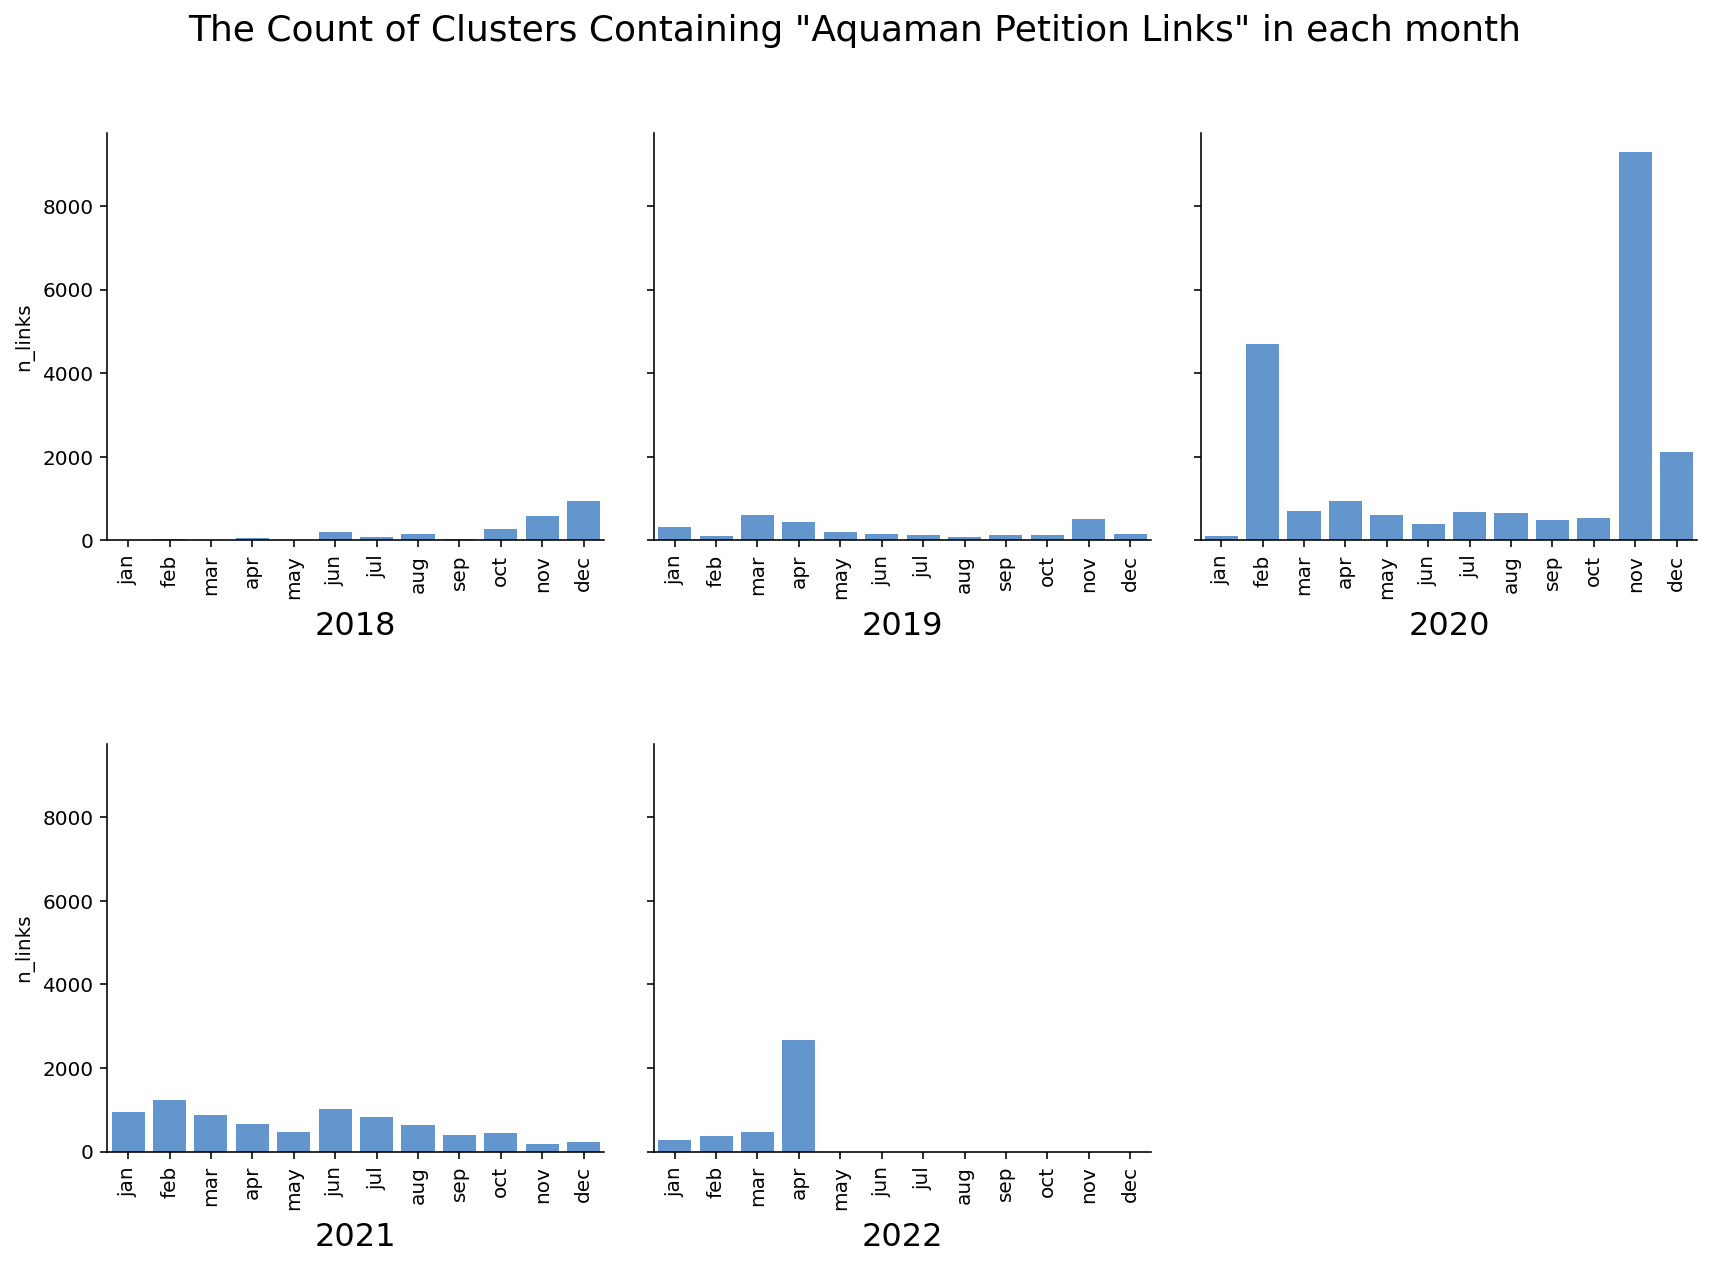

In [61]:
title = 'The Count of Clusters Containing "Aquaman Petition Links" in each month'

g = sb.FacetGrid(data=df, col='year', col_wrap=3, height=4) # , col_order=months_ordered if facet_on=='month' else None
g.map(sb.barplot, 'month', 'n_links', palette=["#5296dd"]); # ,order=days_ordered if facet_on=='month' else months_ordered
g.set_xticklabels(rotation=90);
g.set_titles("{col_name}", size=16, y=-0.26); #
#     g.set_yticklabels(size = 4)
#     g.set_xticklabels(size = 10)

plt.suptitle(title, y=1.06, fontsize=18)
g.fig.subplots_adjust(wspace=0.1, hspace=0.5)
g.set_xlabels("")
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True)

In [52]:
# for y in years:
#     tmp = df[df.year.astype('str') == y]
#     helpers.bar_peaks(tmp[['month', 'n_links']], 'title', threshold=0, xlabel='month')

<br>

### Save the Aquaman Clusters info DataFrame

In [32]:
aquaman_clusters.to_csv('aquaman_clusters_info.csv', encoding='utf-8', index=False)

In [33]:
# Load DATA
df = pd.read_csv('aquaman_clusters_info.csv')
print(df.shape)
df.head(2)

(1462, 4)


,year,month,cluster,n_links
0,2018,jan,tweets5,10
1,2018,jan,tweets6,1


## Total Number of Clusters Containing Aquaman Petition Links > 10
(> 10 tweets with links within the same cluster)

In [30]:
(aquaman_clusters.n_links>10).sum()

608

---

# SampleCluster 

In [31]:
# def get_sample():
#     for year in years:
#         for month in months:
#             path = 'Clustering Results/' + year + ' Clustering Twitter Result/data/' + month[1]
#             try:        
#                 for file in os.listdir(path):
#                     if file.endswith('.json'):
#                         with open( os.path.join(path, file) ) as f:
#                             tweets = pd.DataFrame(json.load(f))
#                             aquaman = tweets[tweets.full_text.str.lower().str.contains('aquaman|petition')]
#                             aquaman_petition = aquaman[aquaman.full_text.str.lower().str.contains('http')]
#                             if len(aquaman_petition) > 1000:
#                                 print(f'Year: {year}, Month: {month}, File: {file}')
#                                 return 0
                            
#             except: 
#                 break  
#     return 0

In [20]:
# t0 = time()
# get_sample()
# print((time()-t0)/60)

Year: 2020, Month: (11, 'nov'), File: tweets1.json
0.4597428957621256


<br>

<br>